## Task 2 - Prediction Using Unsupervised ML

This task performs K-Means clustering on the Iris dataset, finding the optimal number of clusters and visualizing the data's natural groupings. It helps determine how different species of iris flowers can be clustered based on their sepal length, sepal width, and petal length.

In [9]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

### Segment 1: Data Loading and Exploration

Explanation:
In this segment, we import the required libraries and load the Iris dataset.
We create a Pandas DataFrame 'iris_df' to store the dataset and display the first 15 rows.
This step helps us get an initial overview of the data.

In [10]:
# Load the Iris dataset and create a DataFrame
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Display the first 15 rows of the dataset
iris_df.head(15)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


### Segment 2: Feature Selection

Explanation:
Here, we select a subset of features ('sepal length', 'sepal width', 'petal length') from the dataset.
These selected features are stored in the variable 'X' and will be used for clustering.


In [11]:
# Feature selection for K-Means clustering
selected_features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']
X = iris_df[selected_features].values


### Segment 3: Determining the Optimal Number of Clusters

Explanation:
In this segment, we use the Elbow Method to determine the optimal number of clusters.
We iterate through a range of cluster numbers (1 to 10) and calculate the within-cluster sum of squares (WCSS).
The WCSS measures the variance within each cluster and is used to identify the optimal number of clusters.


In [4]:
# Finding the optimum number of clusters for K-Means classification using the Elbow Method
inertia_values = []

for num_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)


### Segment 4: Elbow Method Plot

Explanation:
In this segment, we create a plot to visualize the results of the Elbow Method analysis.
We identify the potentially optimal number of clusters based on the elbow point in the plot.
An annotation and a red arrow are added to highlight this point.

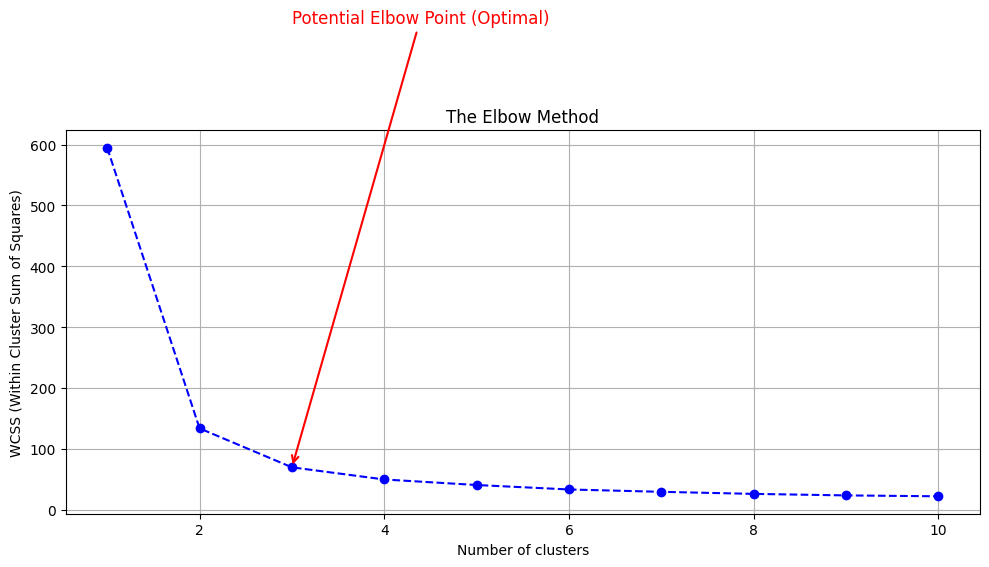

In [5]:
# Plotting the Elbow Method to determine the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia_values, marker='o', linestyle='--', color='b')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.grid()

# Adding markers for the potentially optimal number of clusters
plt.annotate('Potential Elbow Point (Optimal)', xy=(3, inertia_values[2]), xytext=(3, 800), fontsize=12,
             arrowprops=dict(arrowstyle='->', lw=1.5, color='r'), color='r')

plt.tight_layout()
plt.show()


### Segment 5: K-Means Clustering

Explanation:
In this segment, we apply K-Means clustering with the potentially optimal number of clusters determined using the Elbow Method.
We initialize the K-Means model and fit it to our feature data 'X'.
The cluster assignments for each data point are stored in 'y_kmeans'.


In [6]:
# Applying K-Means clustering with the chosen number of clusters
optimal_num_clusters = 3  # You can update this with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)


### Segment 6: Visualizing the Clusters

Explanation:
In this segment, we create a scatter plot to visualize the results of the K-Means clustering.
Each data point is colored according to its assigned cluster label, and centroids are plotted in yellow.
This visualization helps us understand how the data points are grouped into clusters based on the selected features.


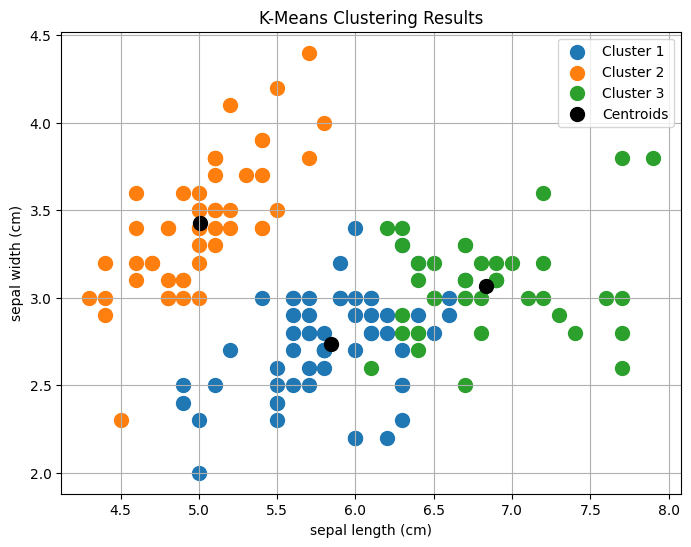

In [13]:
# Visualizing the clusters
plt.figure(figsize=(8, 6))
for cluster_label in range(optimal_num_clusters):
    plt.scatter(X[y_kmeans == cluster_label, 0], X[y_kmeans == cluster_label, 1], label=f'Cluster {cluster_label + 1}', s=100)

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids')
plt.title('K-Means Clustering Results')
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.legend()
plt.grid()
plt.show()
